**Logistic regression**

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Логистическая регрессия — это алгоритм классификации, который используется, когда мы хотим спрогнозировать категориальную переменную (Да/Нет, Прошел/Не прошел) на основе набора независимых переменных.

Предположения:

Зависимая переменная должна быть категориальной.
Независимые переменные (признаки) должны быть независимыми (во избежание мультиколлинеарности).

In [36]:
df = pd.read_csv("/kaggle/input/employee-dataset/Employee.csv")
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


In [37]:
df.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


<Axes: xlabel='Age', ylabel='count'>

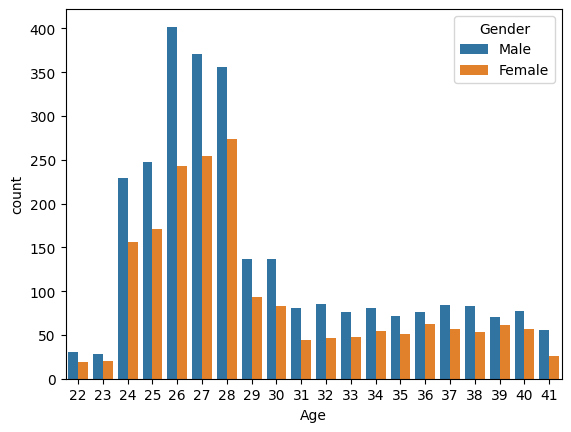

In [38]:
sns.countplot(x='Age', hue='Gender', data=df)

<Axes: xlabel='Age', ylabel='Gender'>

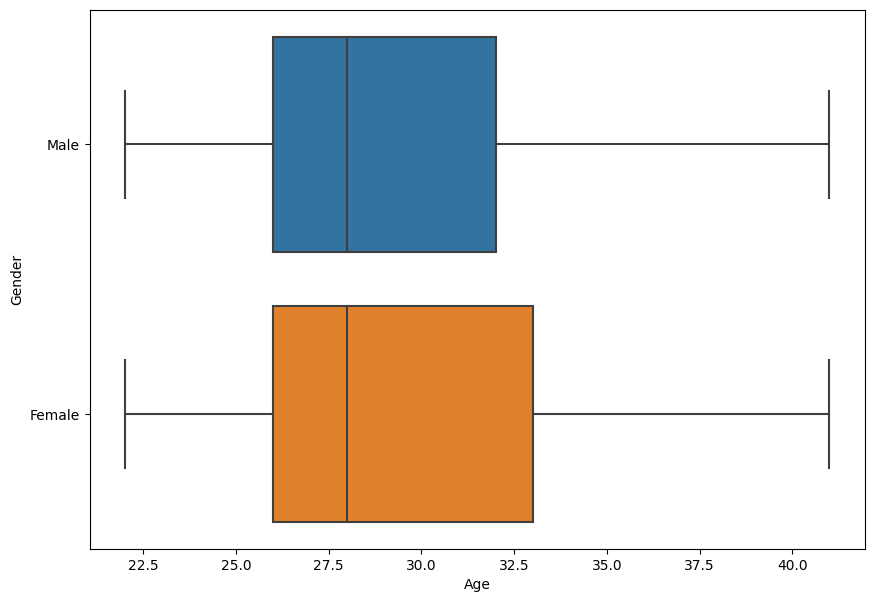

In [39]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Age',y='Gender',data=df)

In [40]:
X = df[["JoiningYear"]]
Y = df["Age"]


In [41]:
X = df[["JoiningYear"]]
Y = df["Age"]
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
model = LogisticRegression()
model.fit(X, Y)
survival_status = model.predict(X)
accuracy = accuracy_score(Y,survival_status)
slope = model.coef_

In [42]:
print(slope)

[[-0.00062875]
 [-0.0006387 ]
 [ 0.0003945 ]
 [ 0.00043525]
 [ 0.00065051]
 [ 0.00063487]
 [ 0.00063886]
 [ 0.0001388 ]
 [ 0.00011671]
 [-0.00016382]
 [-0.00013681]
 [-0.00016777]
 [-0.0001219 ]
 [-0.00017182]
 [-0.00011114]
 [-0.00010405]
 [-0.00012195]
 [-0.00014059]
 [-0.00012922]
 [-0.00037298]]


In [43]:

accuracy 

0.13862024500322373

In [44]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y, survival_status)
print(confusion_matrix)

[[  0   0   0   0  49   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0  48   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0 385   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0 418   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0 645   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0 625   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0 630   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0 230   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0 220   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0 125   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0 132   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0 124   0   0   0   0   0   0   0   0   0   0   0